In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import mysql.connector as mysql
import warnings
import contextlib


warnings.filterwarnings("ignore")

In [2]:
user = os.environ.get('USER')
password = os.environ.get('PASSWORD')
host = os.environ.get('HOST')
database = os.environ.get('DATABASE')

In [3]:
with open('../sql/analysis.sql', 'r') as f:
    query = f.read()

In [4]:
with mysql.connect(user=user, password=password, host=host, database=database) as conn:
    
    data = pd.read_sql(query, conn)

In [5]:
data.head()

,id_wycieczki,ilosc_uczestnikow,kwota,ilosc_dni,miasto,kraj,tematyka,data_rozpoczecia
0,948,14,42652.91,9,Rijeka,Chorwacja,Parkur po cudzych balkonach,2015-06-11
1,676,8,36820.25,14,Kopenhaga,Dania,Parkur po cudzych balkonach,2023-06-20
2,1220,10,35149.53,12,Wenecja,Włochy,Zawody w liczeniu kropli deszczu,2021-06-05
3,2402,10,34911.40,12,Poznań,Polska,Zawody w tłumaczeniu języka pingwinów,2022-06-02
4,1967,9,33868.41,12,Marsylia,Francja,Parkur po cudzych balkonach,2022-07-20


In [6]:
data['data_rozpoczecia'] = pd.to_datetime(data['data_rozpoczecia'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_wycieczki       2553 non-null   int64         
 1   ilosc_uczestnikow  2553 non-null   int64         
 2   kwota              2553 non-null   float64       
 3   ilosc_dni          2553 non-null   int64         
 4   miasto             2553 non-null   object        
 5   kraj               2553 non-null   object        
 6   tematyka           2553 non-null   object        
 7   data_rozpoczecia   2553 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 159.7+ KB


In [8]:
data['kwota_na_osobe_na_dzien'] = data['kwota'] / (data['ilosc_uczestnikow'] * data['ilosc_dni'])


In [36]:
sns.set_theme(style="darkgrid")

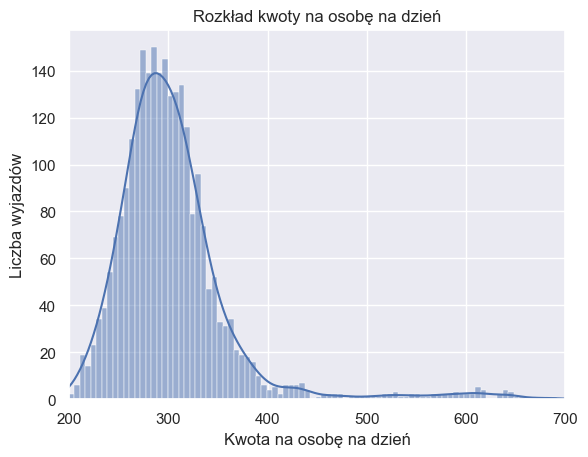

In [37]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):
    ax = sns.histplot(data=data, x='kwota_na_osobe_na_dzien', kde=True, bins=100)
    plt.xlim(200, 700)
    ax.set(xlabel='Kwota na osobę na dzień', ylabel='Liczba wyjazdów')
    ax.set_title('Rozkład kwoty na osobę na dzień')


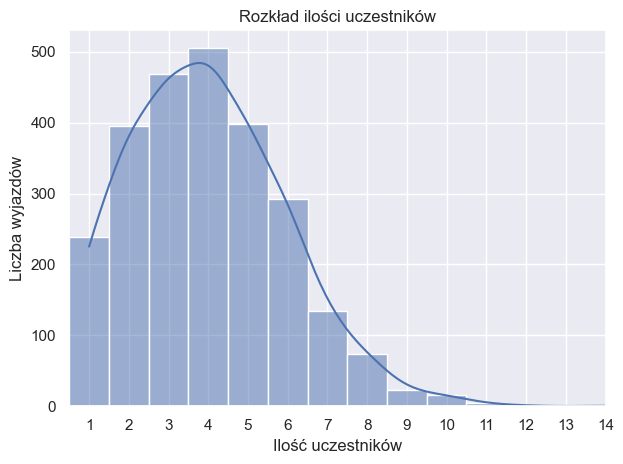

In [38]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):
   ax = sns.histplot(data=data, x='ilosc_uczestnikow', kde=True, discrete=True, kde_kws={'bw_adjust': 1.5}, bins=len(data['ilosc_uczestnikow'].unique()))
   ax.set_xlim(0.5,14)
   plt.xticks(np.arange(1, 15, 1), labels=np.arange(1, 15, 1))
   ax.set(xlabel='Ilość uczestników', ylabel='Liczba wyjazdów')
   ax.set_title('Rozkład ilości uczestników')
   plt.tight_layout()  

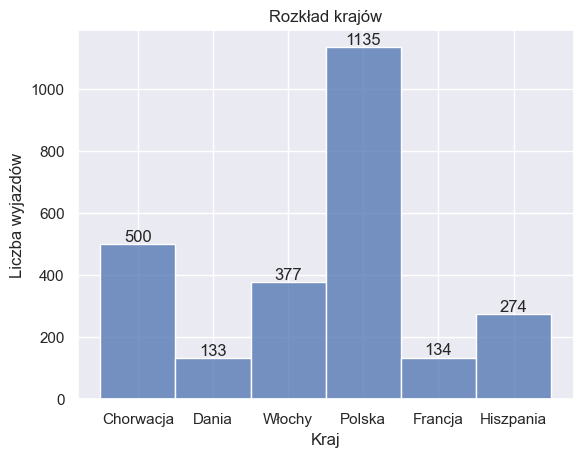

In [39]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):
    ax = sns.histplot(x='kraj', data=data)
    ax.set(xlabel='Kraj', ylabel='Liczba wyjazdów')
    ax.bar_label(ax.containers[0])
    ax.set_title('Rozkład krajów')

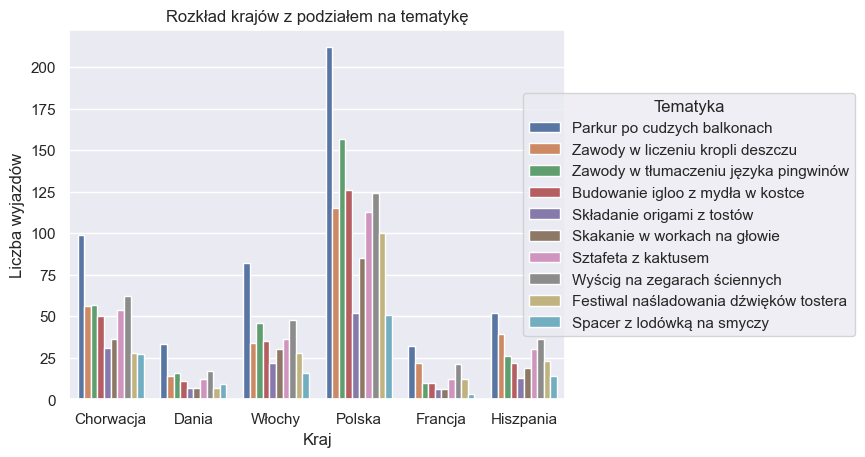

In [40]:

with contextlib.redirect_stdout(open(os.devnull, 'w')):
    ax = sns.countplot(x='kraj', data=data, hue='tematyka', palette='deep')


    ax.legend(title='Tematyka', loc='center right', bbox_to_anchor=(1.6, 0.5))
    ax.set(xlabel='Kraj', ylabel='Liczba wyjazdów')
    ax.set_title('Rozkład krajów z podziałem na tematykę')

In [41]:
months_dict = {1: 'Styczeń', 2: 'Luty', 3: 'Marzec', 4: 'Kwiecień', 5: 'Maj', 6: 'Czerwiec', 7: 'Lipiec', 8: 'Sierpień', 9: 'Wrzesień', 10: 'Październik', 11: 'Listopad', 12: 'Grudzień'}
data['miesiac_rozpoczecia'] = data['data_rozpoczecia'].dt.month
data['miesiac_rozpoczecia'] = data['miesiac_rozpoczecia'].map(months_dict)
data['rok_rozpoczecia'] = data['data_rozpoczecia'].dt.year
data.head()

,id_wycieczki,ilosc_uczestnikow,kwota,ilosc_dni,miasto,kraj,tematyka,data_rozpoczecia,kwota_na_osobe_na_dzien,miesiac_rozpoczecia,rok_rozpoczecia,rok_i_miesiac
0,948,14,42652.91,9,Rijeka,Chorwacja,Parkur po cudzych balkonach,2015-06-11,338.515159,Czerwiec,2015,2015-6
1,676,8,36820.25,14,Kopenhaga,Dania,Parkur po cudzych balkonach,2023-06-20,328.752232,Czerwiec,2023,2023-6
2,1220,10,35149.53,12,Wenecja,Włochy,Zawody w liczeniu kropli deszczu,2021-06-05,292.912750,Czerwiec,2021,2021-6
3,2402,10,34911.40,12,Poznań,Polska,Zawody w tłumaczeniu języka pingwinów,2022-06-02,290.928333,Czerwiec,2022,2022-6
4,1967,9,33868.41,12,Marsylia,Francja,Parkur po cudzych balkonach,2022-07-20,313.596389,Lipiec,2022,2022-7


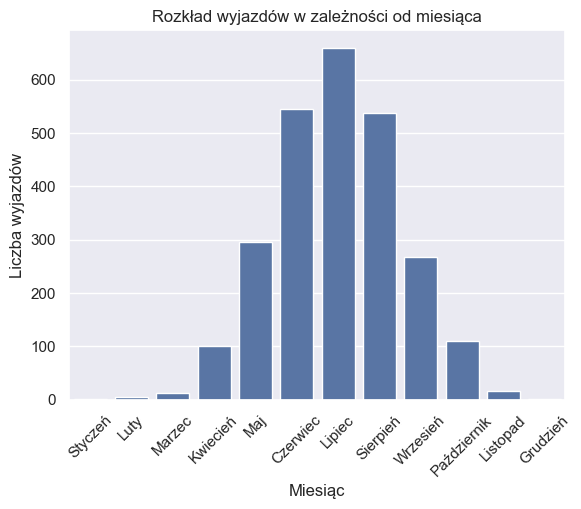

In [42]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):

    ax = sns.countplot(data=data, x='miesiac_rozpoczecia', order=months_dict.values())
    ax.set(xlabel='Miesiąc', ylabel='Liczba wyjazdów')
    ax.set_title('Rozkład wyjazdów w zależności od miesiąca')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

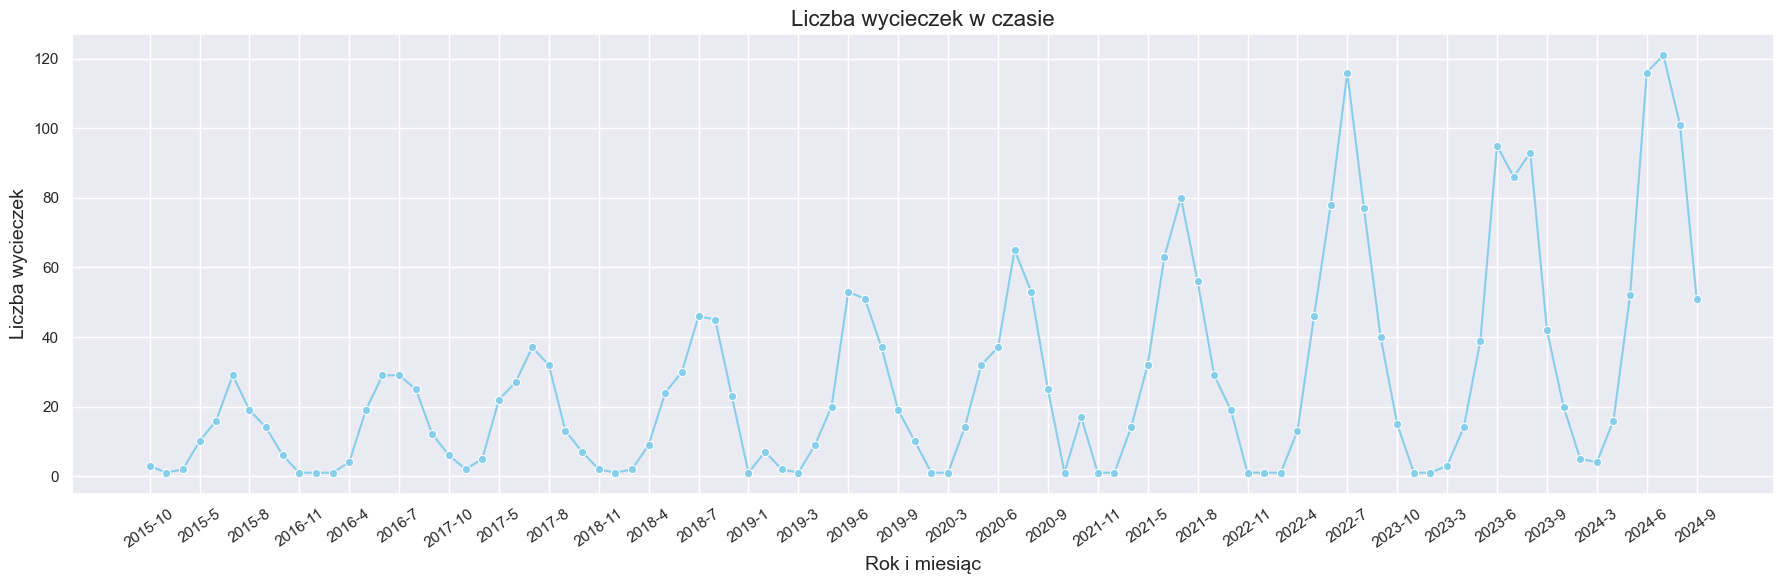

In [47]:
reversed_months_dict = {v: k for k, v in months_dict.items()}


plt.figure(figsize=(18, 6))
data["rok_i_miesiac"] = data["rok_rozpoczecia"].astype(str) + "-" + data["miesiac_rozpoczecia"].map(reversed_months_dict).astype(str)

monthly_trips = data.groupby("rok_i_miesiac").size().reset_index(name="ilosc_wyjazdow")

sns.lineplot(data=monthly_trips, x="rok_i_miesiac", y="ilosc_wyjazdow", marker="o", color="skyblue")

plt.title("Liczba wycieczek w czasie", fontsize=16)
plt.xlabel("Rok i miesiąc", fontsize=14)
plt.ylabel("Liczba wycieczek", fontsize=14)
plt.xticks(
    ticks=np.arange(0, len(monthly_trips), 3), 
    labels=monthly_trips["rok_i_miesiac"][::3], 
    rotation=35
)
plt.tight_layout()
plt.show()


In [16]:
with open('../sql/employee.sql', 'r') as f:
    employee_query = f.read()


with mysql.connect(user=user, password=password, host=host, database=database) as conn:
    
    employee_data = pd.read_sql(employee_query, conn)

In [17]:
employee_data.head()

,imie_i_nazwiako,data_zatrudnienia,stanowisko,wynagrodzenie
0,AdrianKokosza,2024-10-12,Zastępca Kierownika,7650.0
1,LeonardChwedoruk,2022-05-03,Agent Biura Podróży,6370.0
2,JuliuszSura,2022-10-04,Agent Biura Podróży,7100.0
3,AgnieszkaKozień,2023-02-03,Agent Biura Podróży,8200.0
4,AureliaPrzybyś,2023-10-10,Agent Biura Podróży,6580.0


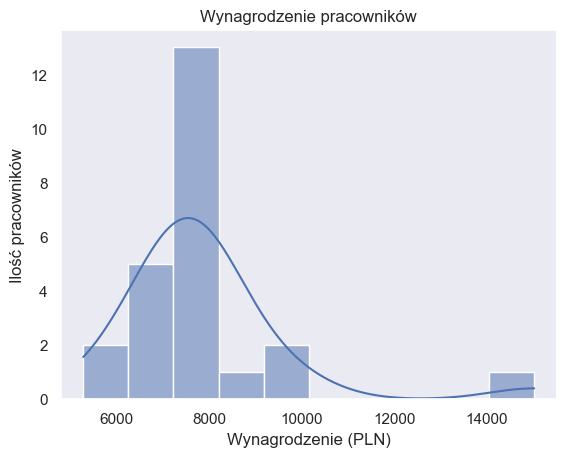

In [18]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):

    ax = sns.histplot(data=employee_data, x='wynagrodzenie', kde=True, bins=10)
    ax.set(xlabel='Wynagrodzenie (PLN)', ylabel='Ilość pracowników')
    ax.set_title('Wynagrodzenie pracowników')

In [ ]:
for u in employee_data['stanowisko'].unique():
    print(u)
    print(employee_data[employee_data['stanowisko'] == u]['wynagrodzenie'].describe())

Zastępca Kierownika
count       2.000000
mean     6950.000000
std       989.949494
min      6250.000000
25%      6600.000000
50%      6950.000000
75%      7300.000000
max      7650.000000
Name: wynagrodzenie, dtype: float64
Agent Biura Podróży
count      17.000000
mean     7324.705882
std       767.944640
min      5290.000000
25%      7100.000000
50%      7340.000000
75%      7910.000000
max      8200.000000
Name: wynagrodzenie, dtype: float64
Przewodnik
count       1.0
mean     9210.0
std         NaN
min      9210.0
25%      9210.0
50%      9210.0
75%      9210.0
max      9210.0
Name: wynagrodzenie, dtype: float64
Prezes
count        1.0
mean     15020.0
std          NaN
min      15020.0
25%      15020.0
50%      15020.0
75%      15020.0
max      15020.0
Name: wynagrodzenie, dtype: float64
Księgowy
count       1.0
mean     7870.0
std         NaN
min      7870.0
25%      7870.0
50%      7870.0
75%      7870.0
max      7870.0
Name: wynagrodzenie, dtype: float64
Analityk danych
count    